# NAME: MUHAMMAD KHIZER.
# ROLL # B-19203048

# NAME: MUHAMMAD MAYER MOHIUDDIN.
# ROLL # B-19203050

# NAME: SHEIKH MUHAMMAD HUZAIFA.
# ROLL # B-19203069

## In this project, we have detailed data of customers in a company and we apply 3 models and compare the results of all three models. The models are multiple regression, decision tree and random forest.

## IMPORTING LIBRARIES

In [160]:
import numpy as np   #first we import the libraries that are use in this model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATA SET

### Context
The dataset is the details of the customers in a company.
### Content
The column are about it's estimated salary, age, gender, etc. Aiming to provide all details about an employee.

In [161]:
dataset = pd.read_csv('Datasets-220712-121443/Churn_Modelling.csv')   #importing data set

In [162]:
dataset.head()   #head function shows five rows from starting

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [163]:
dataset.shape   # it shows total size of our data

(10000, 14)

In [164]:
# here we have alot of column and some are not needed in our model so we remove all the unwanted columns

In [165]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], axis=1, inplace = True)

In [166]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,101348.88,1
1,608,Spain,Female,41,1,83807.86,112542.58,0
2,502,France,Female,42,8,159660.80,113931.57,1
3,699,France,Female,39,1,0.00,93826.63,0
4,850,Spain,Female,43,2,125510.82,79084.10,0


## Taking care of missing data

In [167]:
print("Sum of Null Data: ",dataset.isnull().sum().sum())
print("Count of Duplicated Data: ",dataset.duplicated().sum())

Sum of Null Data:  0
Count of Duplicated Data:  0


In [168]:
# So there is not a single missing data

## Dependent & Independent Variables

In [169]:
X = dataset.iloc[ : , :-1].values # independent variables

In [170]:
Y = dataset.iloc[ : , -1].values   # dependent variables

In [171]:
X.shape

(10000, 7)

In [172]:
Y.shape

(10000,)

In [173]:
X

array([[619, 'France', 'Female', ..., 2, 0.0, 101348.88],
       [608, 'Spain', 'Female', ..., 1, 83807.86, 112542.58],
       [502, 'France', 'Female', ..., 8, 159660.8, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 7, 0.0, 42085.58],
       [772, 'Germany', 'Male', ..., 3, 75075.31, 92888.52],
       [792, 'France', 'Female', ..., 4, 130142.79, 38190.78]],
      dtype=object)

## Encoding Categorical Data

In [174]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X = ct.fit_transform(X)

In [175]:
X

array([[1.0, 0.0, 0.0, ..., 2, 0.0, 101348.88],
       [0.0, 0.0, 1.0, ..., 1, 83807.86, 112542.58],
       [1.0, 0.0, 0.0, ..., 8, 159660.8, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 7, 0.0, 42085.58],
       [0.0, 1.0, 0.0, ..., 3, 75075.31, 92888.52],
       [1.0, 0.0, 0.0, ..., 4, 130142.79, 38190.78]], dtype=object)

## Splitting the Dataset

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)


In [177]:
x_train.shape

(8000, 10)

In [178]:
y_train.shape

(8000,)

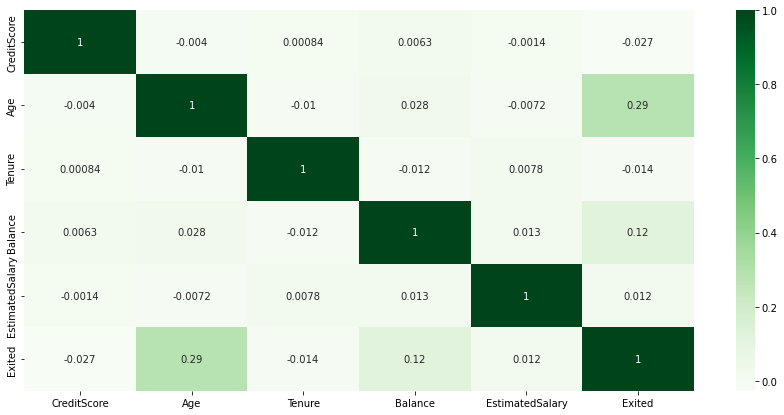

In [179]:
plt.figure(figsize=(15,7))   # here we find the correlations between all the columns.
sns.heatmap(dataset.corr(),annot=True,cmap="Greens")
plt.show()

# MULTIPLE LINEAR REGRESSION
## y = b0 + x1b1 + x2b2 + x3b3 + .......... + xnbn

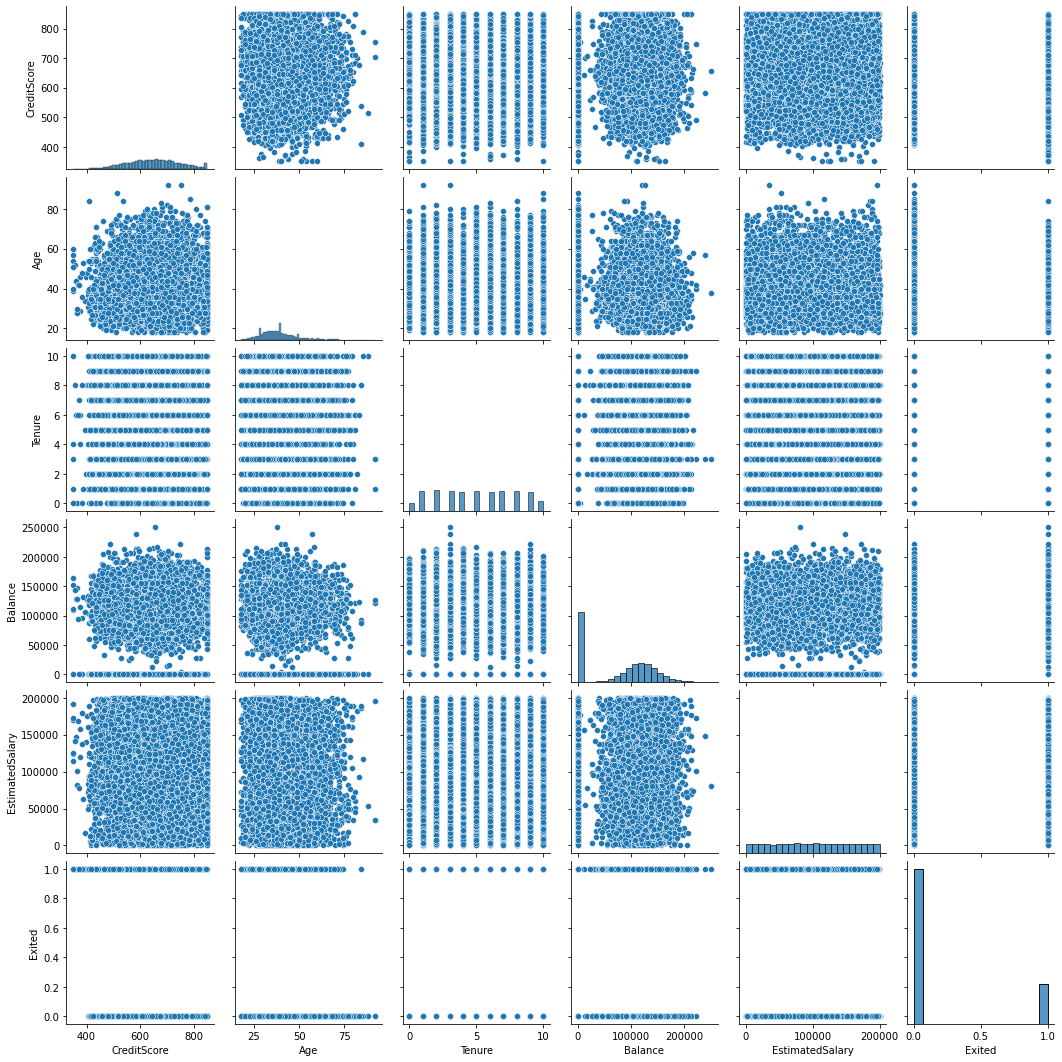

In [180]:
sns.pairplot(dataset) # here we can check which model is suitable for this data.

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [183]:
y_pred = regressor.predict(x_test)

In [184]:
y_pred

array([0.20182979, 0.10600277, 0.2295838 , ..., 0.07189808, 0.25983698,
       0.41199294])

In [185]:
y_pred = y_pred.reshape(len(y_pred), 1)
y_test = y_test.reshape(len(y_test), 1)

In [186]:
y_pred

array([[0.20182979],
       [0.10600277],
       [0.2295838 ],
       ...,
       [0.07189808],
       [0.25983698],
       [0.41199294]])

In [187]:
print(np.concatenate((y_pred, y_test), axis=1))  # to compare the values

[[0.20182979 0.        ]
 [0.10600277 0.        ]
 [0.2295838  0.        ]
 ...
 [0.07189808 0.        ]
 [0.25983698 0.        ]
 [0.41199294 0.        ]]


In [209]:
print(regressor.predict([[1, 0, 0, 0, 1, 620, 40, 2, 68451, 145623]])) 

[0.15025557]


In [189]:
# if we round it off, the value is 0, which means not exited

In [190]:
from sklearn.metrics import confusion_matrix,accuracy_score

### exited = b0 + b1xs1 + b2xs2 + b3xs3 + b4xs4 + b5xs5 + b6xCreditScore + b7xAge + b8xTenure + b9xBalance + b10xEstimatedSalary

In [107]:
print(regressor.coef_, regressor.intercept_)

[-4.27023064e-02  7.92450928e-02 -3.65427864e-02  3.86671256e-02
 -3.86671256e-02 -1.05546614e-04  1.02571597e-02 -4.90084651e-04
  3.70787546e-07  4.59867608e-08] -0.1443198291125529


# Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [149]:
regressor.predict([[1,0,0,1,0,720,43,2,85000,120000]])

array([1.])

In [140]:
# it gives the exact result

# RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
regressor = RandomForestRegressor(n_estimators = 10, random_state= 0)
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [156]:
regressor.predict([[0,1,0,0,1,690,49,5,96000,145000]])

array([0.7])

# COMPARING ALL RESULTS

In [202]:
print('The result of Multiple Regression is', regressor.predict([[1, 0, 0, 0, 1, 620, 40, 2, 85000, 145623]])) 

The result of Multiple Regression is [0.15639173]


In [203]:
print('The result of Decision Tree is', regressor.predict([[1,0,0,0,1,620,40,2,85000,145623]]))

The result of Decision Tree is [0.15639173]


In [206]:
print('The result of Random Forest is', regressor.predict([[1,0,0,0,1,620,40,2,85000,145623]]))

The result of Random Forest is [0.15639173]
